In [49]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
from skimage import io
from os.path import expanduser
HOME = expanduser("~")
import os, sys
import cv2
from pprint import pprint
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
animal = 'DK55'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}'
INPUT = os.path.join(DIR, 'preps', 'CH2', 'thumbnail')

In [123]:
def linnorm(img, limit, mask=None):
    if mask is not None:
        img = img * (mask > 10)
    flat = img.flatten()
    hist, bins = np.histogram(flat, limit + 1)
    cdf = hist.cumsum()  # cumulative distribution function
    cdf = limit * cdf / cdf[-1]  # normalize
    # use linear interpolation of cdf to find new pixel values
    img_norm = np.interp(flat, bins[:-1], cdf)
    img_norm = np.reshape(img_norm, img.shape)
    if mask is not None:
        img_norm = img_norm * (mask > 10)
    return img_norm

def change_roi(img, brightness, area):
    med = np.median(img[img > 0])
    mn = np.mean(img[img > 0])
    a = img.copy()
    b = get_roi(a, area)
    b[b > brightness] = mn + 150
    return a

def get_roi(img, area):
    endr, endc = img.shape
    midr = endr // 2
    midc = endc // 2
    if 'lr' in area:
        b = img[midr:endr,midc:endc]
    else:
        b = img[0:midr, 0:endc]
    return b


Text(0.5, 1.0, 'fixed')

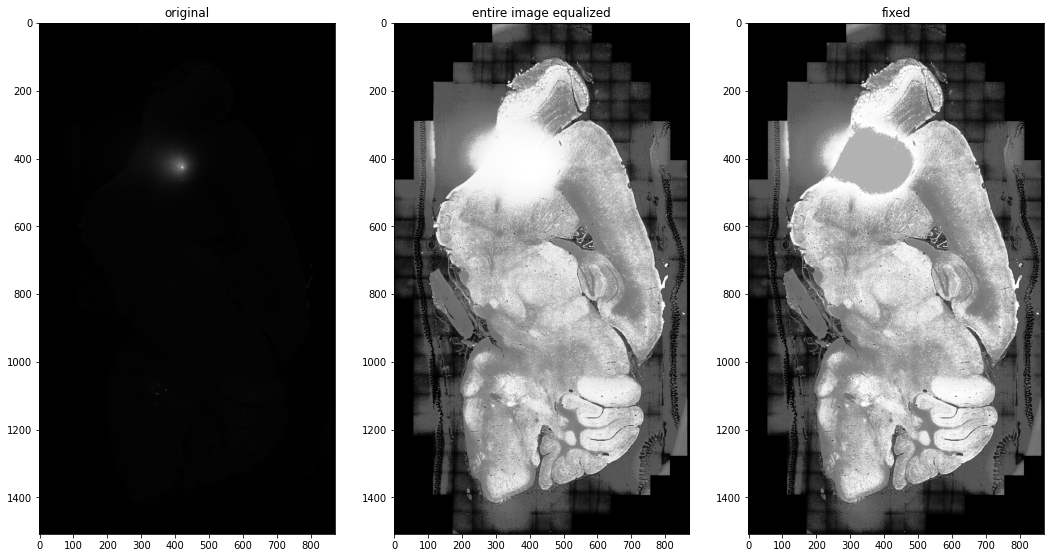

In [124]:
# 181, very dark
# 381, kinda light
file = '184.tif' 
infile = os.path.join(INPUT, file)
img = io.imread(infile)
fixed = img.copy()
normed = linnorm(img, 45000)
rcParams['figure.figsize'] = 18 ,18
med = np.median(img[img > 0])
#fixed[fixed > 10000] = 2**16-1
fixed = change_roi(img, 2000, 'ur')
fixed = linnorm(fixed, 45000)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap="gray");
ax[0].set_title('original')
ax[1].imshow(normed, cmap="gray");
ax[1].set_title('entire image equalized')
ax[2].imshow(fixed, cmap="gray");
ax[2].set_title('fixed')

In [106]:
arr = np.zeros([8,8])
arr[0][1] = 900
arr[1][1] = 900
arr[7][6] = 1000
arr[7][7] = 1000
pprint(arr)
fixed = change_roi(arr, 1, 'ur')
pprint(fixed)

array([[   0.,  900.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,  900.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0., 1000., 1000.]])
array([[   0.,  950.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,  950.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,   